# Importamos la DB de MySQL

In [2]:
import pandas as pd
from sqlalchemy import create_engine

# Conectamos a la base de datos
host ='localhost'
database='olympics'
user='root'
password='****'

# Creamos una cadena de conexión
cadena_conexion = f'mysql+mysqlconnector://{user}:{password}@{host}/{database}'

# Creamos el motor de conexión
motor = create_engine(cadena_conexion)

# Creamos una lista de las tablas a cargar
nombres_tablas = ['city', 'competitor_event', 'event', 'games', 'games_city', 'games_competitor', 'medal', 'noc_region', 'person', 'person_region', 'sport']

# Usamos el método globals() y con un bucle for leemos cada tabla en un DataFrame para almacenarlo en el diccionario
for nombre in nombres_tablas:
    query = f'SELECT * FROM {nombre}'
    df_name = f'df_{nombre}'
    globals()[df_name] = pd.read_sql(query, con=motor)

# Para verificar la carga correcta, accedemos a las primeras 5 filas de la tabla CITY 
df_city.head()

,id,city_name
0,1,Barcelona
1,2,London
2,3,Antwerpen
3,4,Paris
4,5,Calgary


# Exploramos datos

In [13]:
df_games_competitor.describe()

,id,games_id,person_id,age
count,180252.000000,180252.000000,180252.000000,180252.000000
mean,90126.500000,21.013220,68053.147760,25.783342
std,52034.414698,11.940895,39090.510838,6.096013
min,1.000000,1.000000,1.000000,10.000000
25%,45063.750000,12.000000,34300.750000,22.000000
50%,90126.500000,21.000000,68102.000000,25.000000
75%,135189.250000,29.000000,101910.000000,29.000000
max,180252.000000,51.000000,135571.000000,97.000000


# Gráfico: Competidores por género

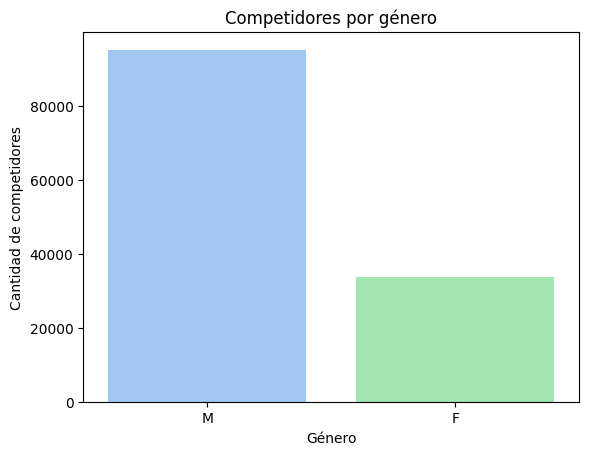

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Definimos un estilo
plt.style.use("seaborn-v0_8-pastel")


sns.countplot(x='gender', data=df_person, hue='gender')
plt.xlabel('Género')
plt.ylabel('Cantidad de competidores')
plt.title('Competidores por género')
plt.show()

# Gráfica: Competidores por edad

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


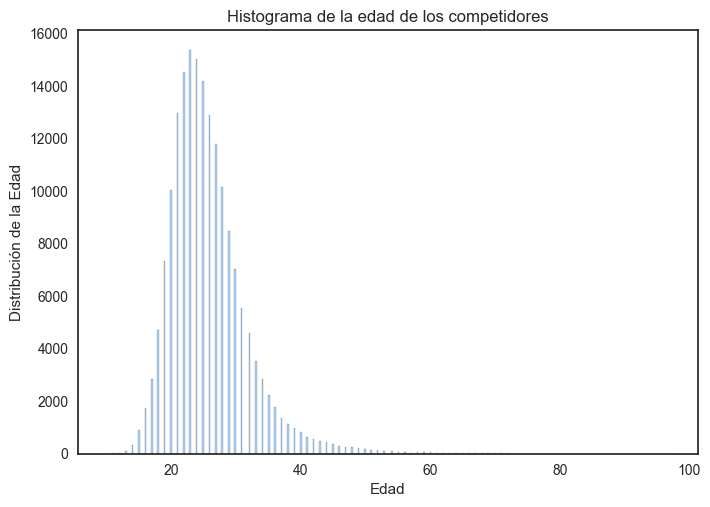

In [59]:

sns.histplot(df_games_competitor['age'], kde=False)
plt.xlabel('Edad')
plt.ylabel('Distribución de la Edad')
plt.title('Histograma de la edad de los competidores')
plt.legend( )
plt.show()

# Gráfico: Segmentación de competidores por rango de edad

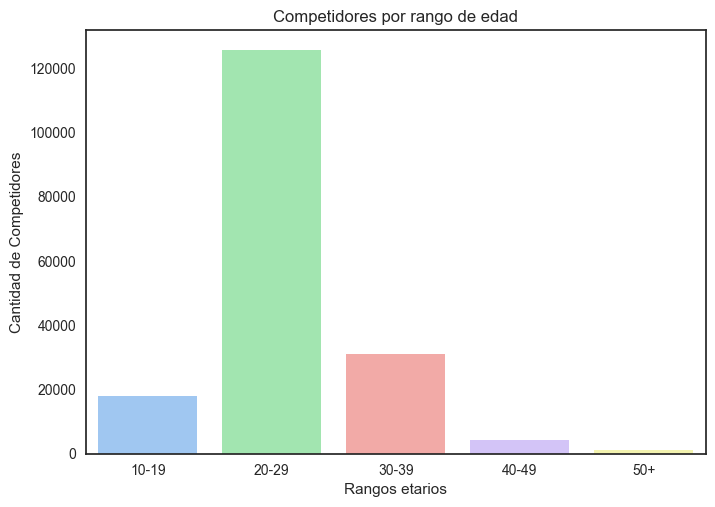

In [60]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos grupos de edad
bins = [10, 20, 30, 40, 50, np.inf] #np.inf es límite infinito
labels = ['10-19', '20-29', '30-39', '40-49', '50+']
df_games_competitor['age_group'] = pd.cut(df_games_competitor['age'], bins=bins, labels=labels, right=False)


# Creamos el gráfico de conteo
sns.countplot(x='age_group', hue='age_group', data= df_games_competitor)

# Colocamos título y etiquetas a los ejes
plt.title('Competidores por rango de edad')
plt.xlabel('Rangos etarios')
plt.ylabel('Cantidad de Competidores')

# Mostramos el gráfico
plt.show()

La mayoría de competidores tienen entre 20 y 29 años.

# Exploramos la variable 'Peso' 

In [61]:
df_person['weight'].describe()

count    128854.000000
mean         55.733675
std          32.704643
min           0.000000
25%          49.000000
50%          66.000000
75%          77.000000
max         214.000000
Name: weight, dtype: float64

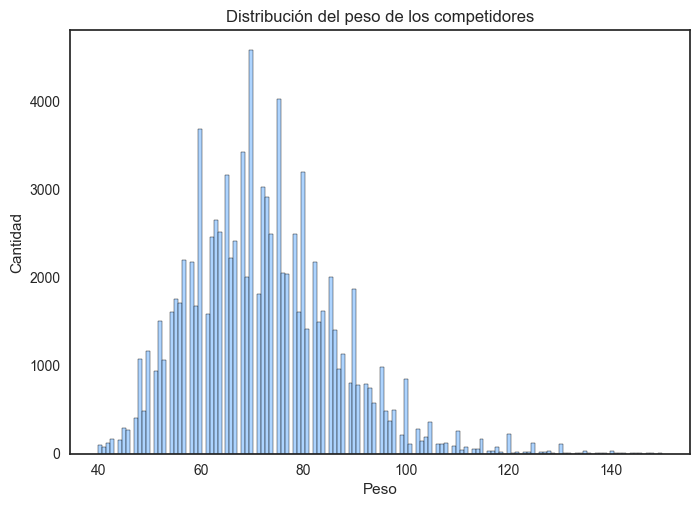

In [62]:
# Filtramos el DataFrame para que solo contenga pesos entre 40 y 200

df_filtered = df_person[(df_person['weight'] >= 40) & (df_person['weight'] <= 150)]

sns.histplot(df_filtered['weight'], kde=False)
plt.xlabel('Peso')
plt.ylabel('Cantidad')
plt.title('Distribución del peso de los competidores')

plt.show()

Hay muchos valores nulos que se toman como 0, por lo que filtramos para graficar sólo los valores entre 40 y 200.
La mayoría de los competidores pesan entre 50kg. y 90kg. El peso máximo registrado es de 214kg. 

# Gráfico de dispersión 'Peso-Altura'

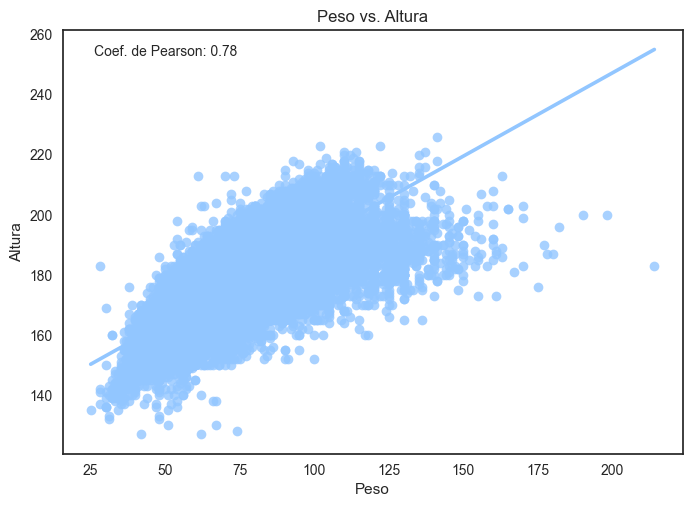

In [63]:
# Filtramos los valores 0 de los DF

df_filtered = df_person[(df_person['weight'] != 0) 
                        & (df_person['height'] !=0)]


# Al gráfico de dispersión le añadiremos una línea de tendencia y el coeficiente de pearson 
from scipy.stats import pearsonr

# Calculamos el coeficiente de correlación de Pearson
pearson_corr, _ = pearsonr(df_filtered['weight'], df_filtered['height'])

# Creamos el gráfico de dispersión con línea de tendencia
sns.regplot(x='weight', y='height', data=df_filtered, ci=None)

# Configuramos etiquetas y título
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.title('Peso vs. Altura')

# Añadimos el coeficiente de correlación al gráfico
plt.text(0.05, 0.95, f'Coef. de Pearson: {pearson_corr:.2f}', ha='left', va='center', transform=plt.gca().transAxes)

# Mostramos el gráfico
plt.show()

El diagrama de dispersión entre las variables peso y altura indica una correlación positiva. Confirmada mediante la línea de tendencia y el coeficiente de Pearson de 0,78.

# Gráfico: Porcentaje de competidores que ganaron medallas

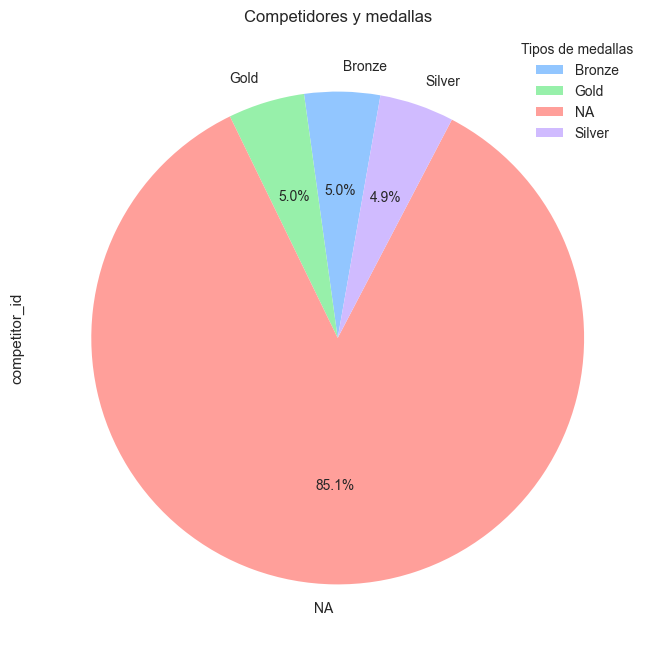

In [64]:
# Unimos los DF
datos = pd.merge(df_medal, df_competitor_event, how='inner', left_on='id', right_on='medal_id')

# Ejemplo con un Pie
competidores_medalla = datos.groupby('medal_name')['competitor_id'].count()

# Creamos gráfico de pastel
plt.figure(figsize=(14, 8))
competidores_medalla.plot(kind='pie', autopct='%1.1f%%', startangle=80)
 
plt.title('Competidores y medallas')
plt.legend(title='Tipos de medallas')
plt.show()

El 85% de participantes no ha ganado medallas. Mientras que aproximadamente el 5% ha ganado Oro, el 4,9% Plata y el 5% Bronce.

# Gráfico: Medallas según género del competidor

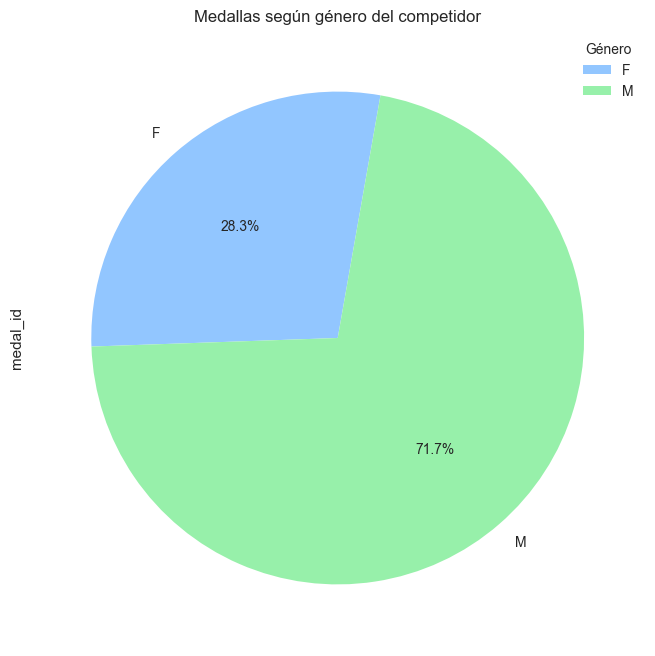

In [68]:
# Unimos DF
nuevo_df= pd.merge(df_competitor_event, df_games_competitor, left_on='competitor_id', right_on='id')

df_person['id_person'] = df_person['id']

df_final = pd.merge(nuevo_df, df_person, left_on='person_id', right_on='id_person')

# Ejemplo con un Pie
medallas_por_genero = df_final.groupby('gender')['medal_id'].count()

# Creamos gráfico de pastel
plt.figure(figsize=(14, 8))
medallas_por_genero.plot(kind='pie', autopct='%1.1f%%', startangle=80)

plt.title('Medallas según género del competidor')
 
plt.legend(title='Género')
plt.show()

El 71,7% de las medallas fueron ganadas por género Masculino y el 28,3% por femenino.

# Gráfico: Tipo de medalla por género y edad

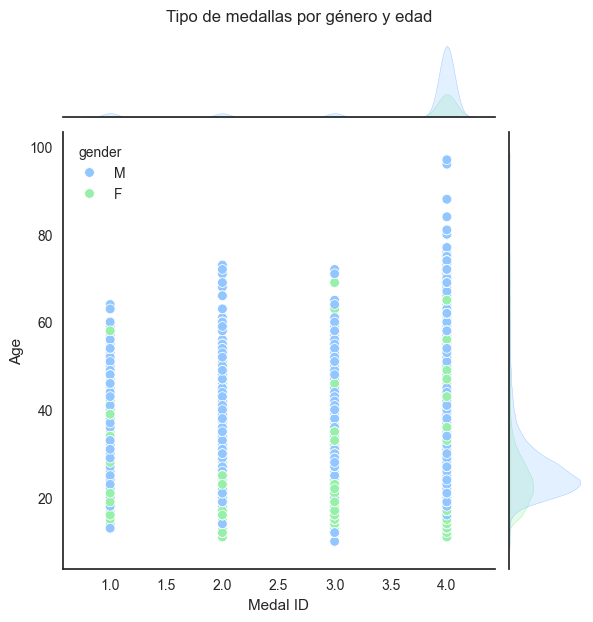

In [66]:
# Graficar dos variables categóricas y una numérica: tipo de medallas por género y edad
# Unimos DF
nuevo_df= pd.merge(df_competitor_event, df_games_competitor, left_on='competitor_id', right_on='id')

df_person['id_person'] = df_person['id']

df_final = pd.merge(nuevo_df, df_person, left_on='person_id', right_on='id_person')

g = sns.jointplot(x='medal_id', y='age', data= df_final, hue='gender')
g.set_axis_labels('Medal ID', 'Age')

g.fig.suptitle('Tipo de medallas por género y edad', y=1.03)  # Ajustar la posición del título


plt.show()

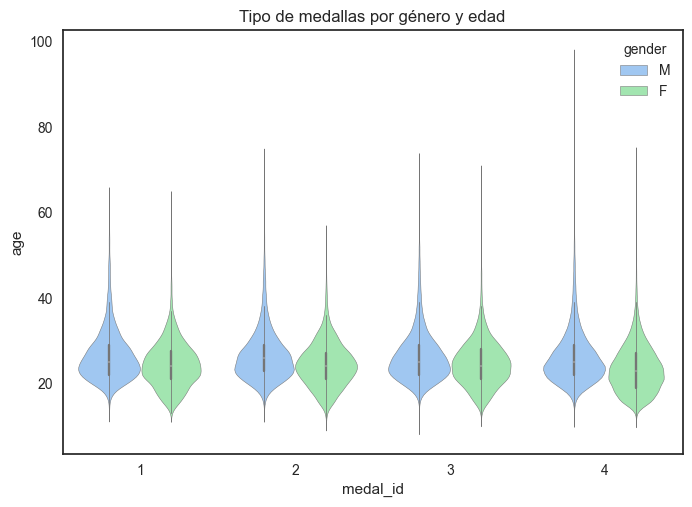

In [67]:
sns.violinplot(x='medal_id', y='age', data= df_final, hue='gender')

plt.title('Tipo de medallas por género y edad')  

plt.show()

El número 4 que equivale a no haber ganado medallas es el que predomina. En los 3 tipos de medalla (1=oro, 2=plata, 3=bronce) hay más cantidad de ganadores de sexo masculino que femenino y de mayor edad en todos los casos. La distribución por edad parece tener una tendencia más cercana a la normal en las mujeres, teniendo más representantes de menor edad (más cercanos a los 20 años) que los hombres. En los hombres la forma del violín indica que la edad de los participantes se concentra entre los 25 y los 30 años, pero compiten hasta más entrada edad llegando hasta los 100 años.

# Gráfico: Cantidad de Olimpiadas por ciudad

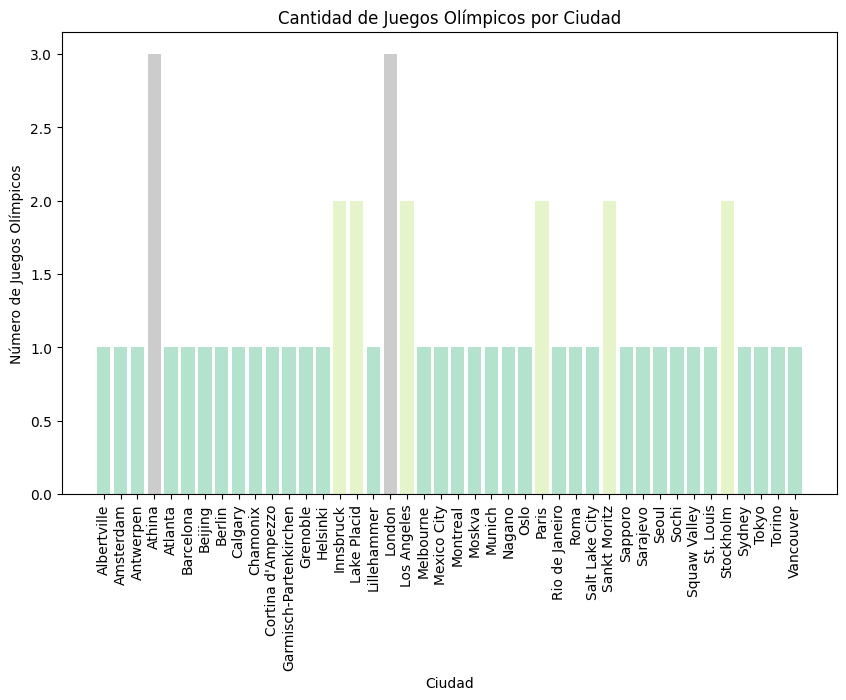

In [20]:
df_merged= pd.merge(df_games_city, df_city, left_on='city_id', right_on='id')

olimp_por_ciudad = df_merged.groupby('city_name')['games_id'].count()

# Creamos un colormap basado en los valores
norm = plt.Normalize(olimp_por_ciudad.min(), olimp_por_ciudad.max())
cmap = plt.cm.Pastel2  # Podemos cambiar 'Pastel2' por cualquier otro colormap
colors = cmap(norm(olimp_por_ciudad.values))

plt.figure(figsize=(10, 6)) 
plt.bar(olimp_por_ciudad.index, olimp_por_ciudad.values, color= colors)
plt.xlabel('Ciudad')
plt.ylabel('Número de Juegos Olímpicos')
plt.title('Cantidad de Juegos Olímpicos por Ciudad')
plt.xticks(rotation=90)  # Rotamos etiquetas

plt.show()

Las ciudades que han celebrado mayor cantidad de juegos olímpicos son Atenas y Londres con 3 juegos cada una. 